In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load and Inspect Data

In [ ]:
df = pd.read_csv('./data/matches.csv')
print(df.head(5))

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [30]:
print(df.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


In [32]:
print(df.shape)
print(df.info())
print(df.describe())

(1095, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  met

In [28]:
print(df.isnull().sum())

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [29]:
print(df['team1'].unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']


## Cleaning and Preprocessing Data

In [33]:
print(df.isnull().sum())

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [ ]:
df = df.drop(['umpire1' , 'umpire2' , 'method' ] , axis=1)

In [42]:
print(df.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over'],
      dtype='object')


In [45]:
df = df.drop(['target_overs' , 'result_margin'] , axis=1)

In [46]:
print(df.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'target_runs', 'super_over'],
      dtype='object')


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
print(df.duplicated().sum())

# If any duplicates found drop it
# df = df.drop_duplicates()

0


In [50]:
# creating new column matches per season
mataches_per_season = df['season'].value_counts().sort_index()
print(mataches_per_season)

season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64


In [51]:
print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   object        
 2   city             1044 non-null   object        
 3   date             1095 non-null   datetime64[ns]
 4   match_type       1095 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   venue            1095 non-null   object        
 7   team1            1095 non-null   object        
 8   team2            1095 non-null   object        
 9   toss_winner      1095 non-null   object        
 10  toss_decision    1095 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1095 non-null   object        
 13  target_runs      1092 non-null   float64       
 14  super_over       1095 non-null   object 

## Data Analysis 

In [52]:
total_matches = df.shape[0]
print("Total matches played :" ,total_matches)

Total matches played : 1095


In [53]:
print("Matches per season : " ,mataches_per_season)

Matches per season :  season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64


In [54]:
most_win = df['winner'].value_counts()
print("Matches won by each teams is : " , most_win)

Matches won by each teams is :  winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Sunrisers Hyderabad             88
Kings XI Punjab                 88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


In [55]:
best_player = df['player_of_match'].value_counts().head(10)
print("The Top 10 Player with most 'Player of the match' is : " , best_player)

The Top 10 Player with most 'Player of the match' is :  player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
YK Pathan         16
RA Jadeja         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64


In [57]:
most_toss_win = df['toss_winner'].value_counts()
print("Most Toss Win Team is : " ,most_toss_win)

Most Toss Win Team is :  toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64


In [60]:
most_venue = df['venue'].value_counts().head(10)
print("Top 10 Venues with Most matches played is : ", most_venue)

Top 10 Venues with Most matches played is :  venue
Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Feroz Shah Kotla                              60
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Sawai Mansingh Stadium                        47
Dubai International Cricket Stadium           46
Wankhede Stadium, Mumbai                      45
Punjab Cricket Association Stadium, Mohali    35
Name: count, dtype: int64


In [68]:
super_over = df[df['super_over'] == 'Y']

print("Teams involved in Super Over matches:")
print(super_over[['team1' , 'team2' , 'winner']])

Teams involved in Super Over matches:
                           team1                        team2  \
66         Kolkata Knight Riders             Rajasthan Royals   
130          Chennai Super Kings              Kings XI Punjab   
328          Sunrisers Hyderabad  Royal Challengers Bangalore   
342  Royal Challengers Bangalore             Delhi Daredevils   
416        Kolkata Knight Riders             Rajasthan Royals   
475             Rajasthan Royals              Kings XI Punjab   
610                Gujarat Lions               Mumbai Indians   
705        Kolkata Knight Riders               Delhi Capitals   
746               Mumbai Indians          Sunrisers Hyderabad   
757               Delhi Capitals              Kings XI Punjab   
765  Royal Challengers Bangalore               Mumbai Indians   
790        Kolkata Knight Riders          Sunrisers Hyderabad   
791               Mumbai Indians              Kings XI Punjab   
835               Delhi Capitals          Sunrisers 

In [71]:
toss_win_match_win = df[df['toss_winner'] == df['winner']]
print("Team that won both toss and match is :")
print(toss_win_match_win['winner'])

Team that won both toss and match is :
1               Chennai Super Kings
8                  Rajasthan Royals
10                 Rajasthan Royals
12                  Deccan Chargers
14              Chennai Super Kings
                   ...             
1072                   Punjab Kings
1073            Sunrisers Hyderabad
1075    Royal Challengers Bengaluru
1078                 Mumbai Indians
1092               Rajasthan Royals
Name: winner, Length: 554, dtype: object


In [80]:
highest_run = df[df['target_runs'] == df['target_runs'].max()]

result = highest_run[['team1', 'team2', 'target_runs', 'winner']]

print("The highest run in IPL history from 2008-2024 is :\n")
print(result.to_string(index=False))

The highest run in IPL history from 2008-2024 is :

              team1                       team2  target_runs              winner
Sunrisers Hyderabad Royal Challengers Bengaluru        288.0 Sunrisers Hyderabad


## Data Visualization

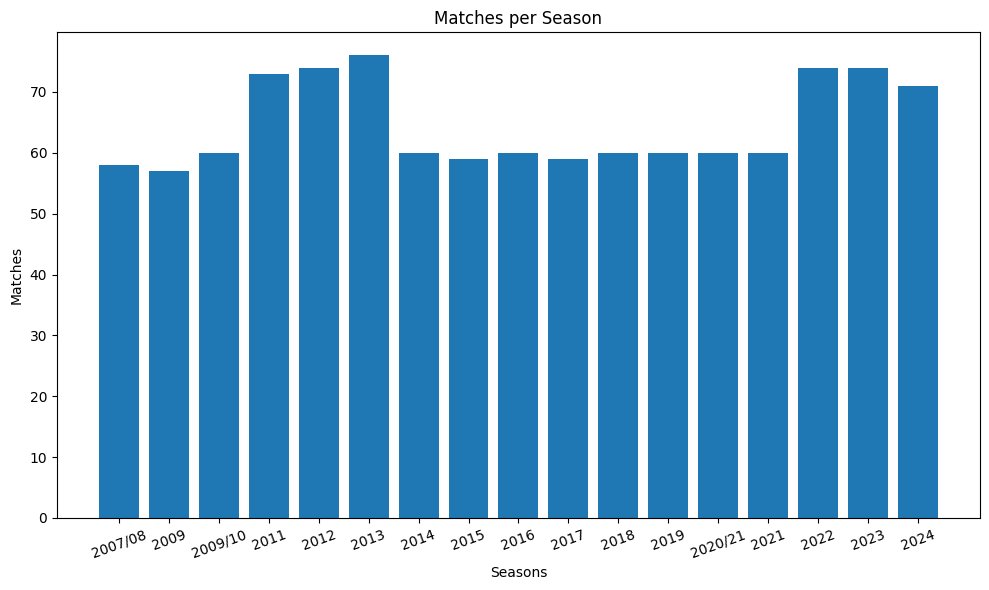

In [ ]:
# Total Matches per season

plt.figure(figsize=(10,6))

plt.bar(mataches_per_season.index , mataches_per_season.values)
plt.title('Matches per Season')
plt.xlabel('Seasons')
plt.xticks(rotation = 20)
plt.ylabel('Matches')
plt.tight_layout()

plt.show()

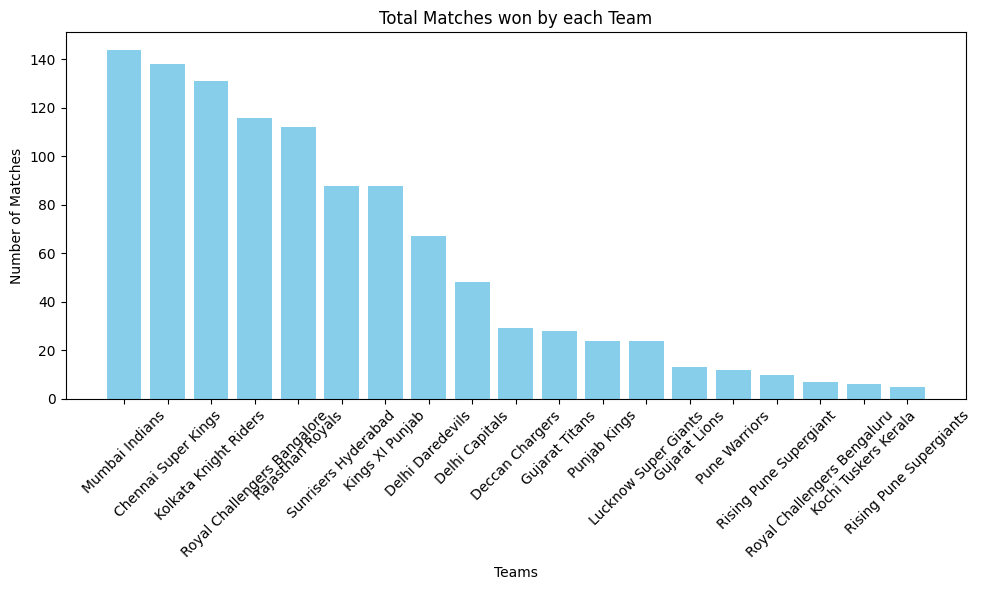

In [91]:
# Matches Won by each Team

plt.figure(figsize=(10,6))

plt.bar(most_win.index , most_win.values , color = 'skyblue')
plt.title('Total Matches won by each Team')
plt.xlabel('Teams')
plt.xticks(rotation = 45)
plt.ylabel('Number of Matches')
plt.tight_layout()

plt.show()

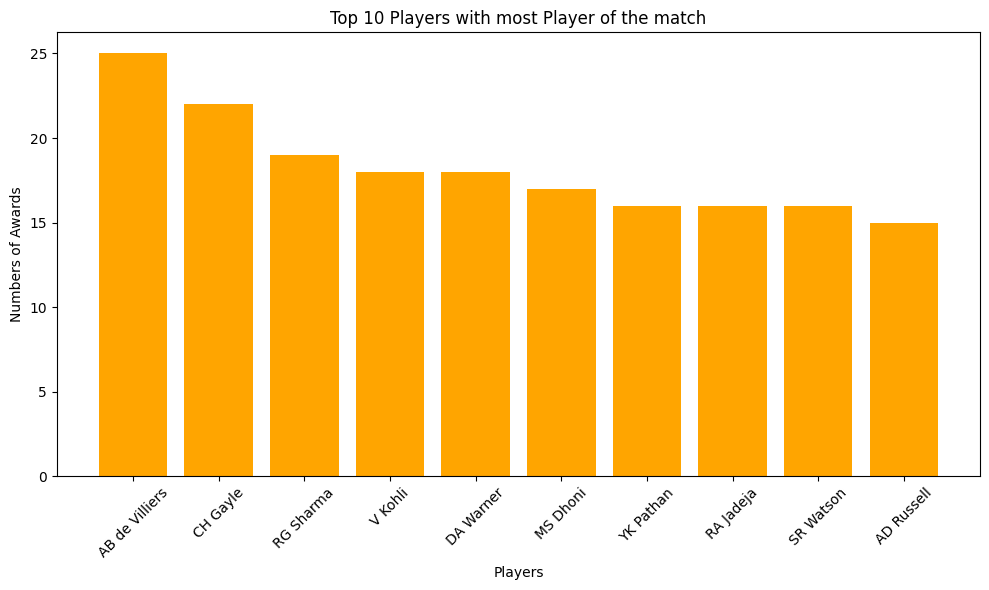

In [94]:
# Top 10 Players with most Player of the match

plt.figure(figsize=(10,6))

plt.bar(best_player.index , best_player.values , color = 'orange')
plt.title('Top 10 Players with most Player of the match')
plt.xlabel('Players')
plt.xticks(rotation = 45)
plt.ylabel('Numbers of Awards')
plt.tight_layout()

plt.show()

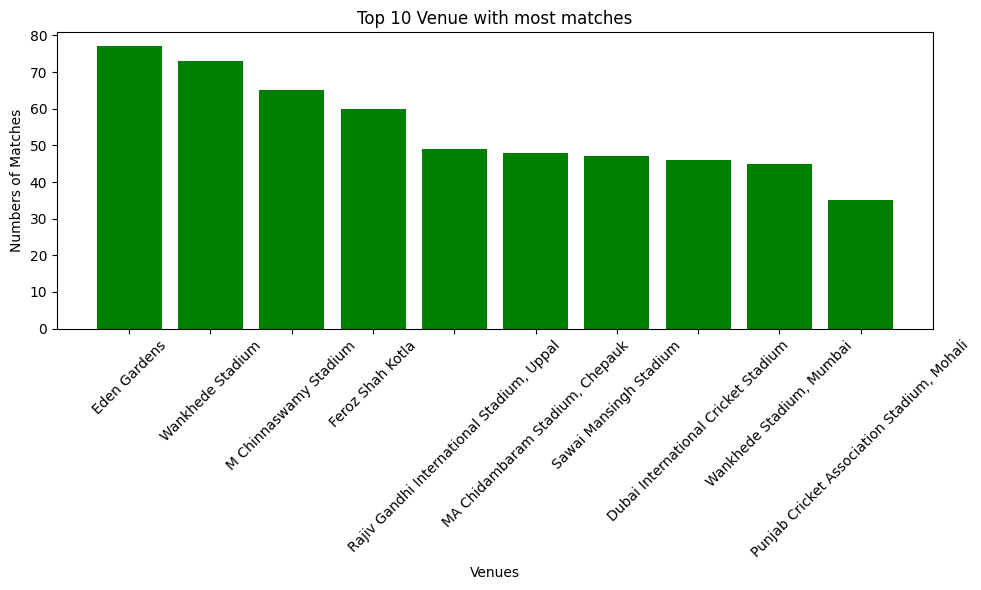

In [96]:
# Top 10 Venue with most matches

plt.figure(figsize=(10,6))

plt.bar(most_venue.index , most_venue.values , color = 'green')
plt.title('Top 10 Venue with most matches')
plt.xlabel('Venues')
plt.xticks(rotation = 45)
plt.ylabel('Numbers of Matches')
plt.tight_layout()

plt.show()